In [1]:
import pandas as pd

train = pd.read_csv('bike-sharing-demand/train.csv')
test = pd.read_csv('bike-sharing-demand/test.csv')

In [2]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

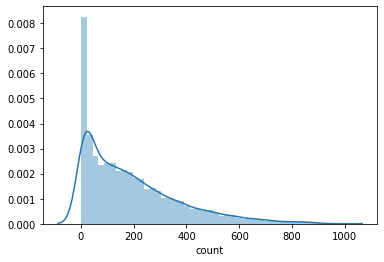

In [9]:
sns.distplot(train['count'])

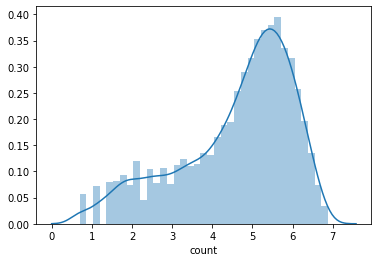

In [10]:
train['count'] = np.log1p(train['count'])
sns.distplot(train['count'])

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [12]:
y_train = train['count'].values

In [13]:
y_train

array([2.83321334, 3.71357207, 3.49650756, ..., 5.12989871, 4.86753445,
       4.48863637])

In [14]:
all_data = pd.concat((train, test)).reset_index(drop=True)

C:\Kim_Jun_Hyeong\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
atemp         17379 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
datetime      17379 non-null object
holiday       17379 non-null int64
humidity      17379 non-null int64
registered    10886 non-null float64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.6+ MB


In [17]:
all_data.shape

(17379, 12)

In [19]:
all_data.drop(['casual'], axis=1, inplace=True)
all_data.drop(['registered'], axis=1, inplace=True)
all_data.drop(['count'], axis=1, inplace=True)

In [20]:
all_data.head()

,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
0,14.395,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0
1,13.635,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0
2,13.635,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0
3,14.395,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0
4,14.395,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0


In [21]:
import datetime
from datetime import datetime

In [23]:
all_data['date'] = all_data.datetime.apply(lambda x: x.split()[0])
all_data['hour'] = all_data.datetime.apply(lambda x: x.split()[1].split(':')[0])

In [24]:
all_data.head()

,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,date,hour
0,14.395,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,2011-01-01,00
1,13.635,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,2011-01-01,01
2,13.635,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,2011-01-01,02
3,14.395,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,2011-01-01,03
4,14.395,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,2011-01-01,04


In [44]:
all_data['weekday'] = all_data.date.apply(lambda dateString: datetime.strptime(dateString, '%Y-%m-%d').weekday())
all_data['month'] = all_data.date.apply(lambda dateString: datetime.strptime(dateString, '%Y-%m-%d').month)

In [45]:
all_data.head()

,atemp,datetime,holiday,humidity,season,temp,weather,windspeed,workingday,date,hour,weekday,month
0,14.395,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0,2011-01-01,00,5,1
1,13.635,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0,2011-01-01,01,5,1
2,13.635,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0,2011-01-01,02,5,1
3,14.395,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0,2011-01-01,03,5,1
4,14.395,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0,2011-01-01,04,5,1


In [47]:
all_data.drop(['datetime'], axis=1, inplace=True)

In [48]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [49]:
train['count'] = y_train

C:\Kim_Jun_Hyeong\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew

In [51]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
numeric_features

Index(['atemp', 'holiday', 'humidity', 'season', 'temp', 'weather',
       'windspeed', 'workingday', 'weekday', 'month'],
      dtype='object')

In [53]:
skewed_feats = all_data[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' : skewed_feats})
skewness

Skew in numerical features: 



,Skew
holiday,5.638051
weather,1.227941
windspeed,0.574856
season,-0.005415
temp,-0.006020
weekday,-0.009235
month,-0.009252
atemp,-0.090421
humidity,-0.111278
workingday,-0.785190


In [54]:
skewness = skewness[abs(skewness)>0.7]
skewness

,Skew
holiday,5.638051
weather,1.227941
windspeed,NaN
season,NaN
temp,NaN
weekday,NaN
month,NaN
atemp,NaN
humidity,NaN
workingday,-0.785190


In [56]:
corr = train.corr(method='pearson').drop(['count']).sort_values('count', ascending=False)['count']
corr

temp          0.376587
atemp         0.372167
month         0.163731
season        0.160452
windspeed     0.122754
weekday       0.027265
holiday      -0.001231
workingday   -0.015326
weather      -0.108005
humidity     -0.333158
Name: count, dtype: float64

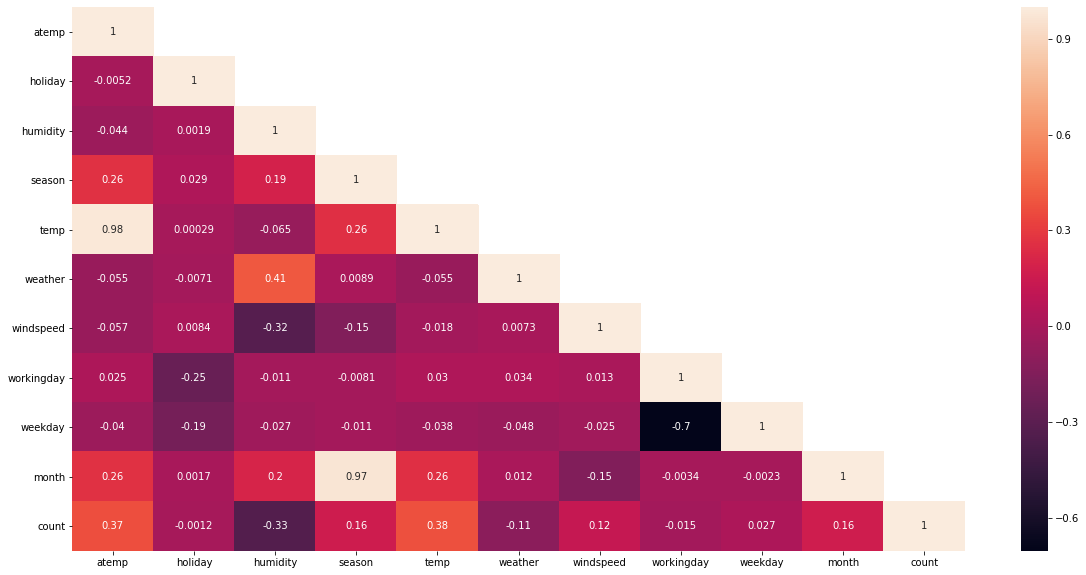

In [62]:
import seaborn as sns

corrMat = train.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMat, mask=mask, vmax=1, square=False, annot=True)

In [64]:
train.head()

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,date,hour,weekday,month,count
0,14.395,0,81,1,9.84,1,0.0,0,2011-01-01,00,5,1,2.833213
1,13.635,0,80,1,9.02,1,0.0,0,2011-01-01,01,5,1,3.713572
2,13.635,0,80,1,9.02,1,0.0,0,2011-01-01,02,5,1,3.496508
3,14.395,0,75,1,9.84,1,0.0,0,2011-01-01,03,5,1,2.639057
4,14.395,0,75,1,9.84,1,0.0,0,2011-01-01,04,5,1,0.693147


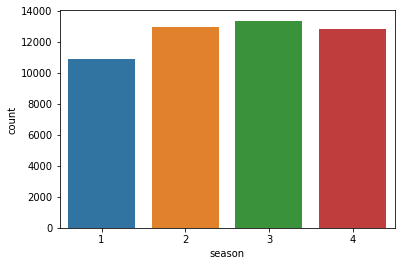

In [65]:
group_season = train.groupby(['season'])['count'].sum().reset_index()
ax = sns.barplot(x = group_season['season'], y = group_season['count'])
ax.set(xlabel='season', ylabel='count')
plt.show()

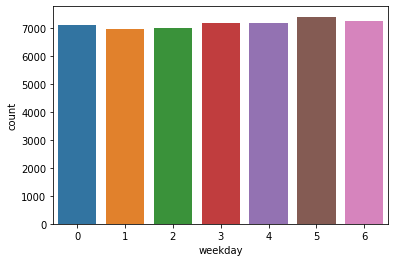

In [67]:
group_day = train.groupby(['weekday'])['count'].sum().reset_index()
ax = sns.barplot(x = group_day['weekday'], y = group_day['count'])
ax.set(xlabel='weekday', ylabel='count')
plt.show()

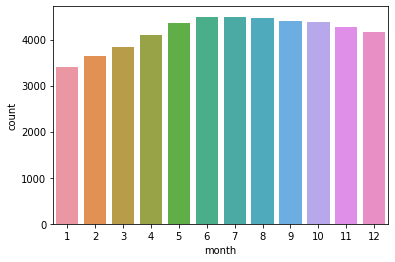

In [68]:
group_month = train.groupby(['month'])['count'].sum().reset_index()
ax = sns.barplot(x = group_month['month'], y = group_month['count'])
ax.set(xlabel='month', ylabel='count')
plt.show()

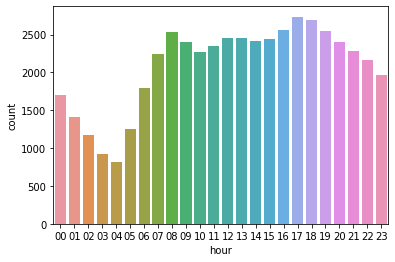

In [71]:
group_hour = train.groupby(['hour'])['count'].sum().reset_index()
ax = sns.barplot(x = group_hour['hour'], y = group_hour['count'])
ax.set(xlabel='hour', ylabel='count')
plt.show()

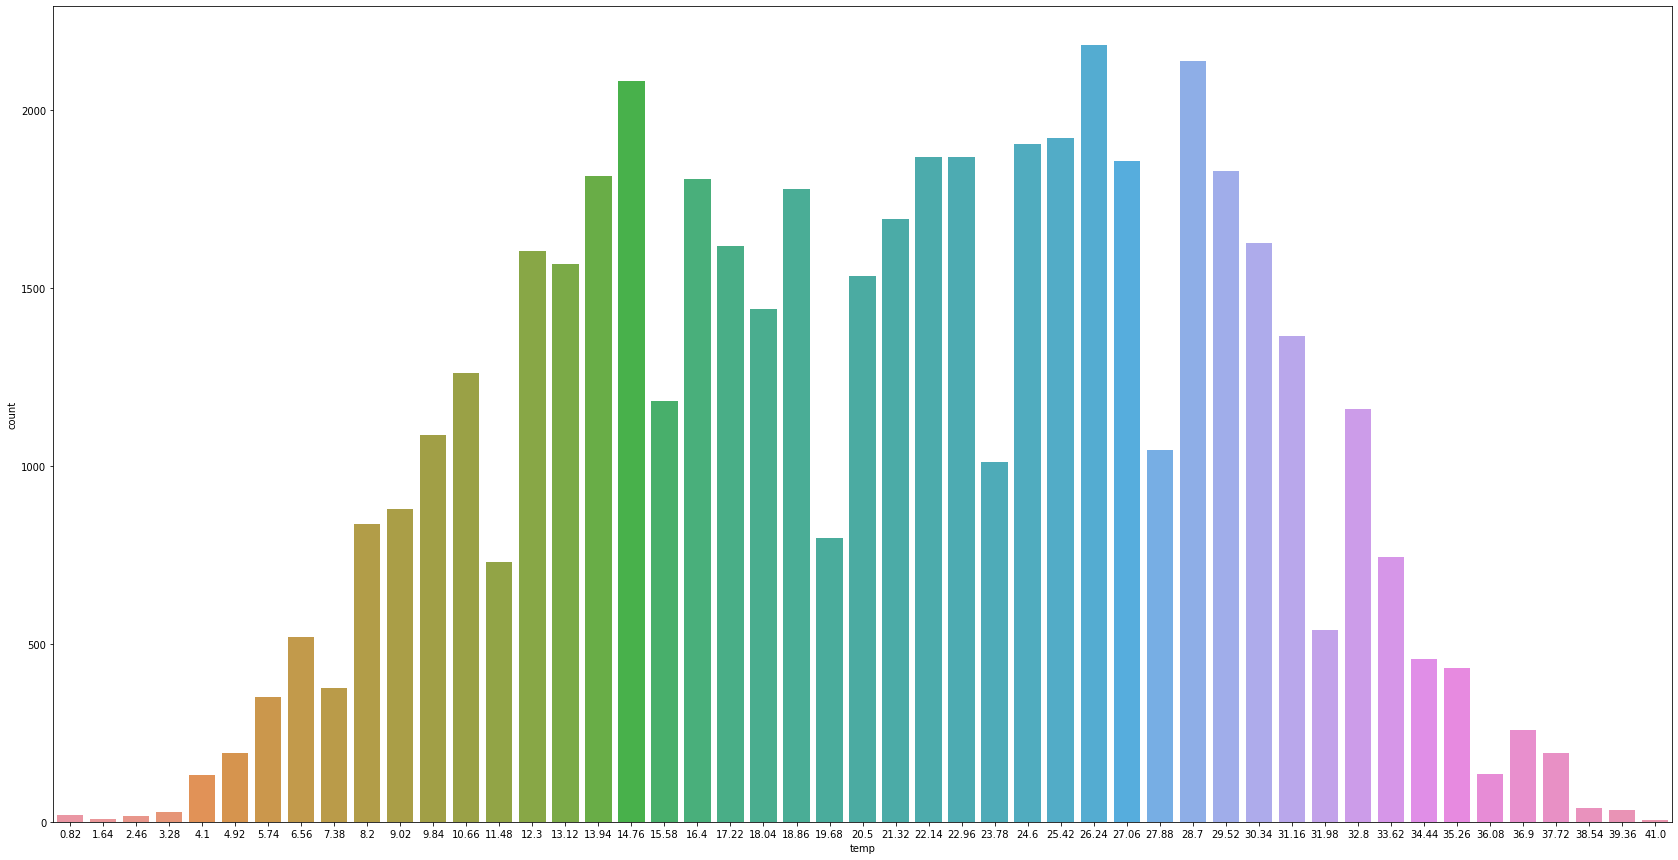

In [72]:
plt.figure(figsize=(29,15))
group_temp = train.groupby(['temp'])['count'].sum().reset_index()
ax = sns.barplot(x = group_temp['temp'], y = group_temp['count'])
ax.set(xlabel='temp', ylabel='count')
plt.show()

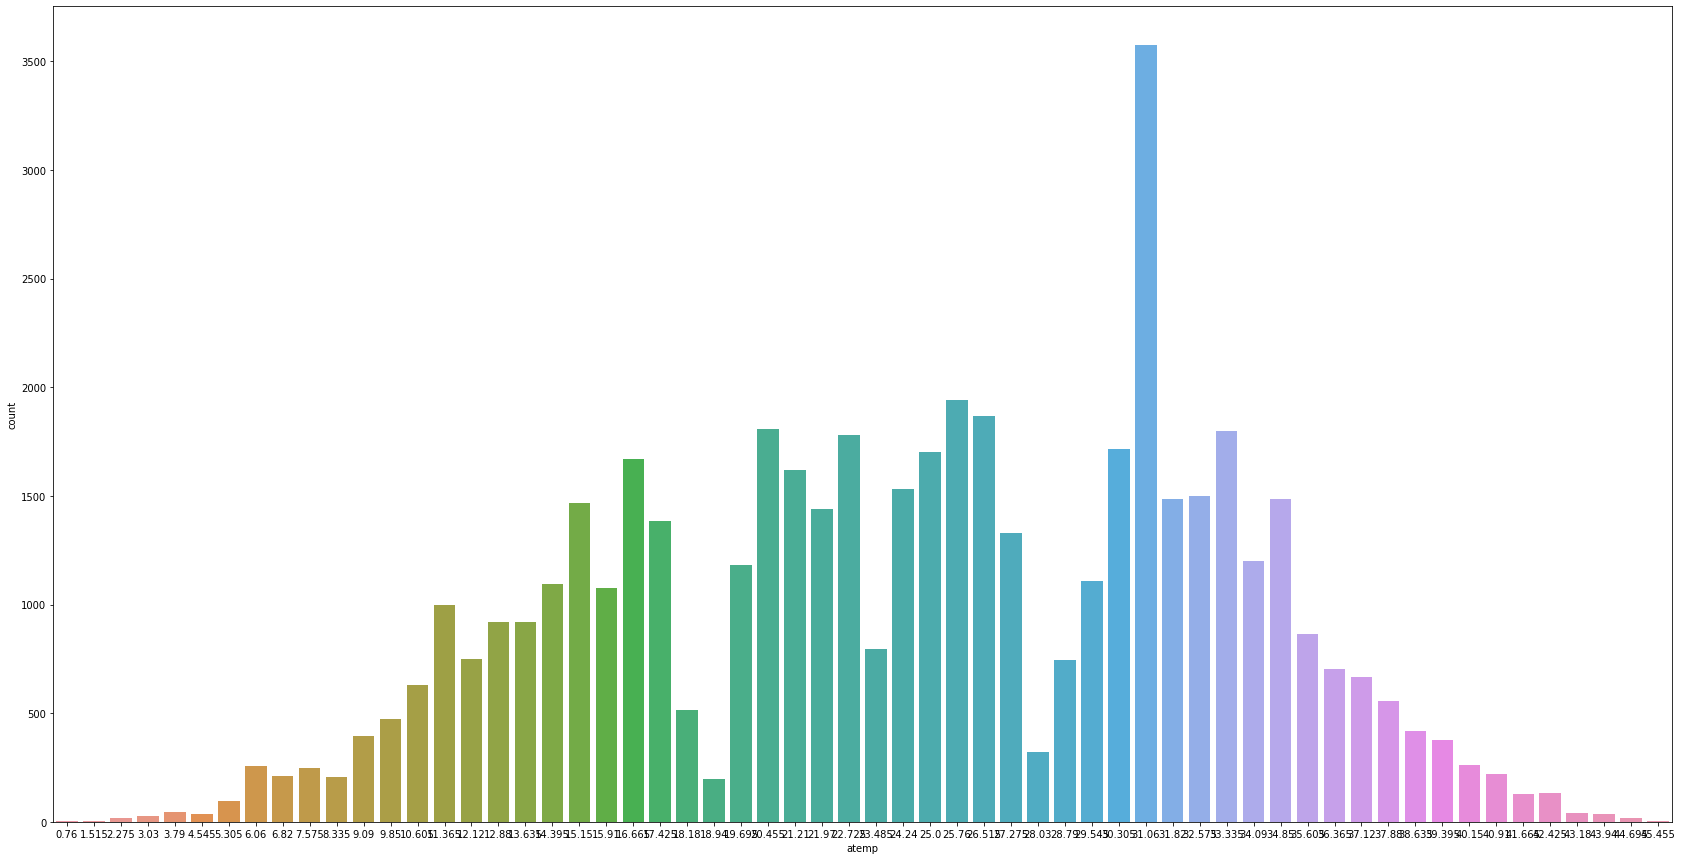

In [73]:
plt.figure(figsize=(29,15))
group_atemp = train.groupby(['atemp'])['count'].sum().reset_index()
ax = sns.barplot(x = group_atemp['atemp'], y = group_atemp['count'])
ax.set(xlabel='atemp', ylabel='count')
plt.show()

In [74]:
all_data['temp'].value_counts()

25.42    726
27.06    693
26.24    692
28.70    690
24.60    675
14.76    671
13.94    645
12.30    641
16.40    614
13.12    611
22.96    579
29.52    570
22.14    569
18.86    559
10.66    559
21.32    556
17.22    548
20.50    531
9.84     522
30.34    516
18.04    507
9.02     421
31.16    396
15.58    372
8.20     354
27.88    349
32.80    325
23.78    305
11.48    301
19.68    288
6.56     230
33.62    213
31.98    169
7.38     155
5.74     138
34.44    138
35.26    131
36.90     90
4.92      76
36.08     53
4.10      51
37.72     49
38.54     17
0.82      17
3.28      17
1.64      16
39.36     16
2.46      16
41.00      1
40.18      1
Name: temp, dtype: int64

In [75]:
train_test_data = [train, test]

In [78]:
for dataset in train_test_data:
    dataset.loc[dataset['temp']<=5, 'temp']=0,
    dataset.loc[(dataset['temp']>5) & (dataset['temp']<=10), 'temp']=1,
    dataset.loc[(dataset['temp']>10) & (dataset['temp']<=15), 'temp']=2,
    dataset.loc[(dataset['temp']>15) & (dataset['temp']<=20), 'temp']=3,
    dataset.loc[(dataset['temp']>20) & (dataset['temp']<=25), 'temp']=4,
    dataset.loc[(dataset['temp']>25) & (dataset['temp']<=30), 'temp']=5,
    dataset.loc[(dataset['temp']>30) & (dataset['temp']<=35), 'temp']=6,
    dataset.loc[dataset['temp']>35, 'temp']=7

In [79]:
train.head()

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,date,hour,weekday,month,count
0,14.395,0,81,1,1.0,1,0.0,0,2011-01-01,00,5,1,2.833213
1,13.635,0,80,1,1.0,1,0.0,0,2011-01-01,01,5,1,3.713572
2,13.635,0,80,1,1.0,1,0.0,0,2011-01-01,02,5,1,3.496508
3,14.395,0,75,1,1.0,1,0.0,0,2011-01-01,03,5,1,2.639057
4,14.395,0,75,1,1.0,1,0.0,0,2011-01-01,04,5,1,0.693147


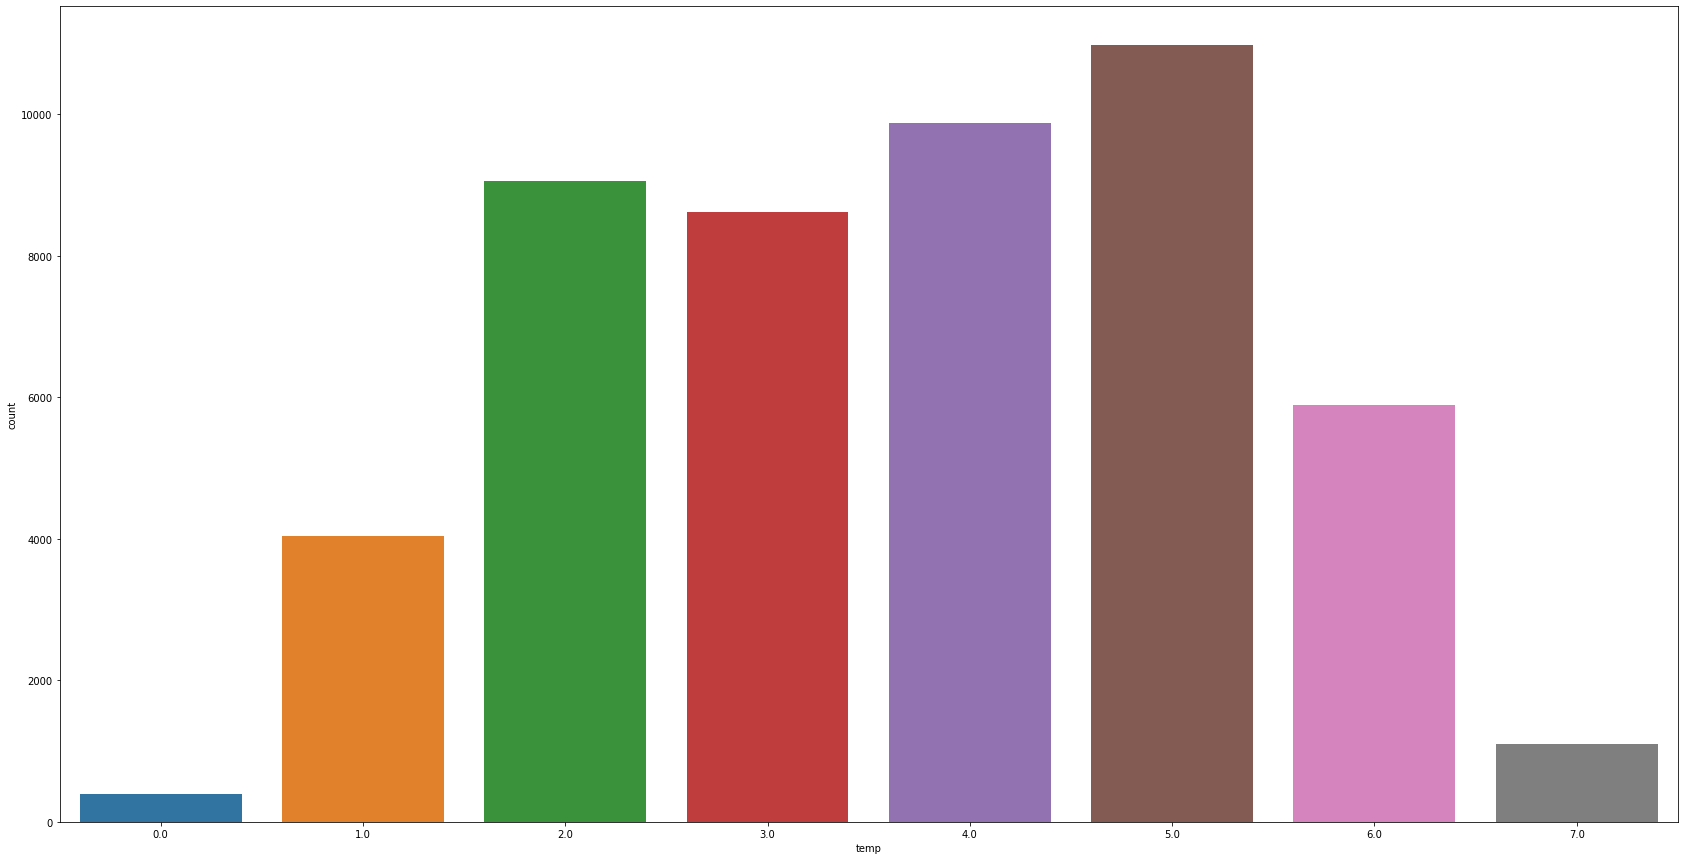

In [80]:
plt.figure(figsize=(29,15))
group_temp = train.groupby(['temp'])['count'].sum().reset_index()
ax = sns.barplot(x = group_temp['temp'], y = group_temp['count'])
ax.set(xlabel='temp', ylabel='count')
plt.show()

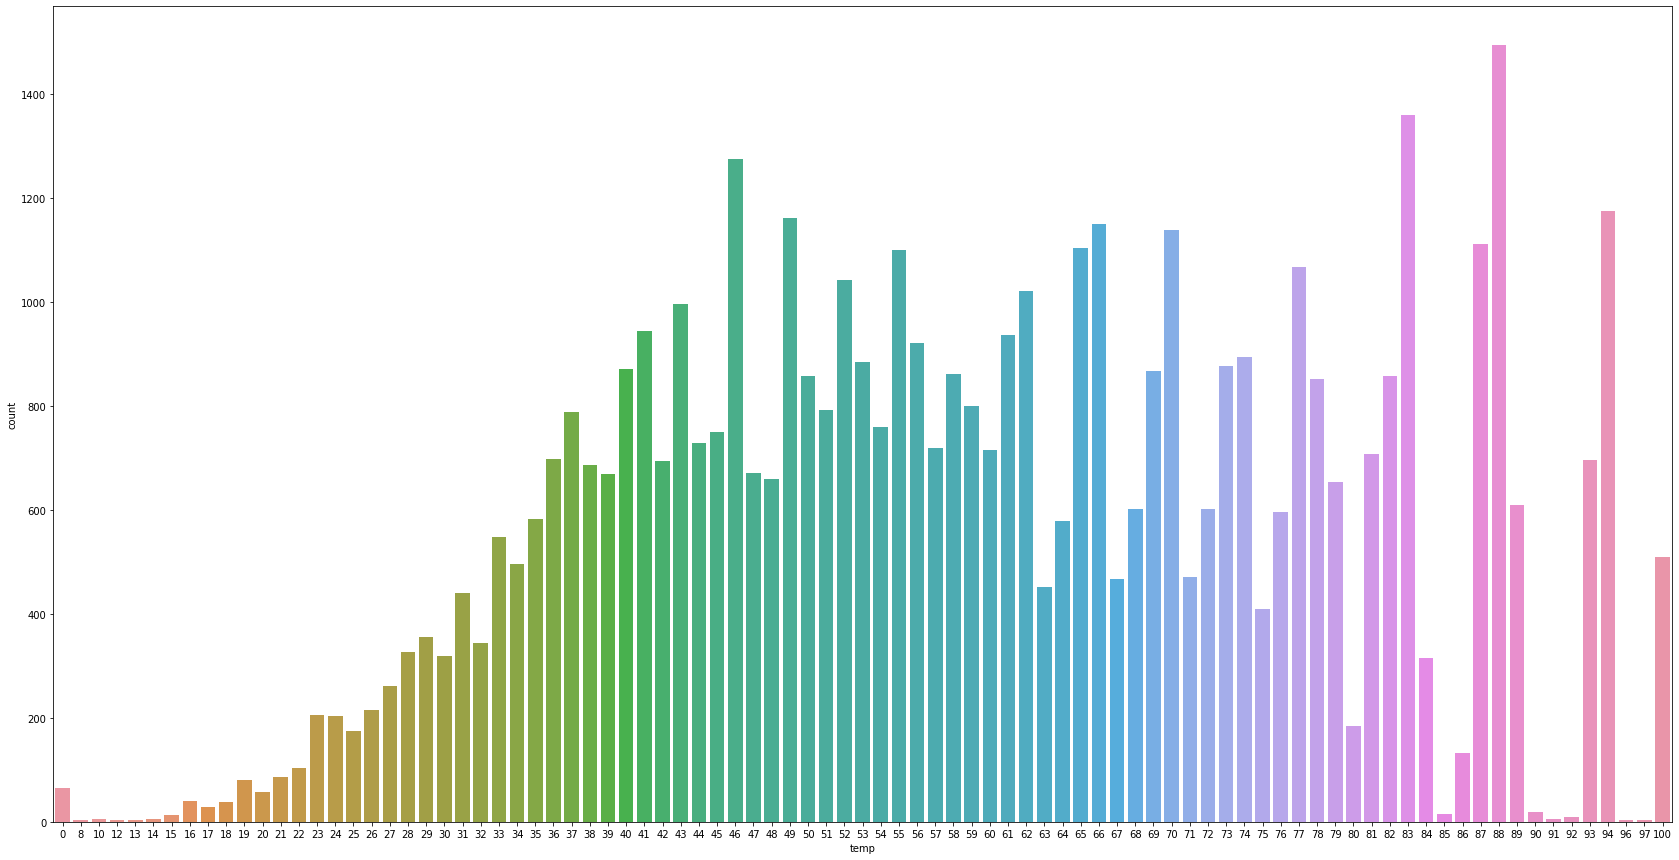

In [81]:
plt.figure(figsize=(29,15))
group_humidity = train.groupby(['humidity'])['count'].sum().reset_index()
ax = sns.barplot(x = group_humidity['humidity'], y = group_humidity['count'])
ax.set(xlabel='temp', ylabel='count')
plt.show()

In [82]:
for dataset in train_test_data:
    dataset.loc[ dataset['humidity'] <= 10, 'humidity'] = 0,
    dataset.loc[(dataset['humidity'] > 10) & (dataset['humidity'] <= 20), 'humidity'] = 1,
    dataset.loc[(dataset['humidity'] > 20) & (dataset['humidity'] <= 30), 'humidity'] = 2,
    dataset.loc[(dataset['humidity'] > 30) & (dataset['humidity'] <= 40), 'humidity'] = 3,
    dataset.loc[(dataset['humidity'] > 40) & (dataset['humidity'] <= 50), 'humidity'] = 4,
    dataset.loc[(dataset['humidity'] > 50) & (dataset['humidity'] <= 60), 'humidity'] = 5,        
    dataset.loc[(dataset['humidity'] > 60) & (dataset['humidity'] <= 70), 'humidity'] = 6, 
    dataset.loc[(dataset['humidity'] > 70) & (dataset['humidity'] <= 80), 'humidity'] = 7, 
    dataset.loc[(dataset['humidity'] > 80) & (dataset['humidity'] <= 90), 'humidity'] = 8,  
    dataset.loc[ dataset['humidity'] > 90, 'humidity'] = 9

C:\Kim_Jun_Hyeong\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


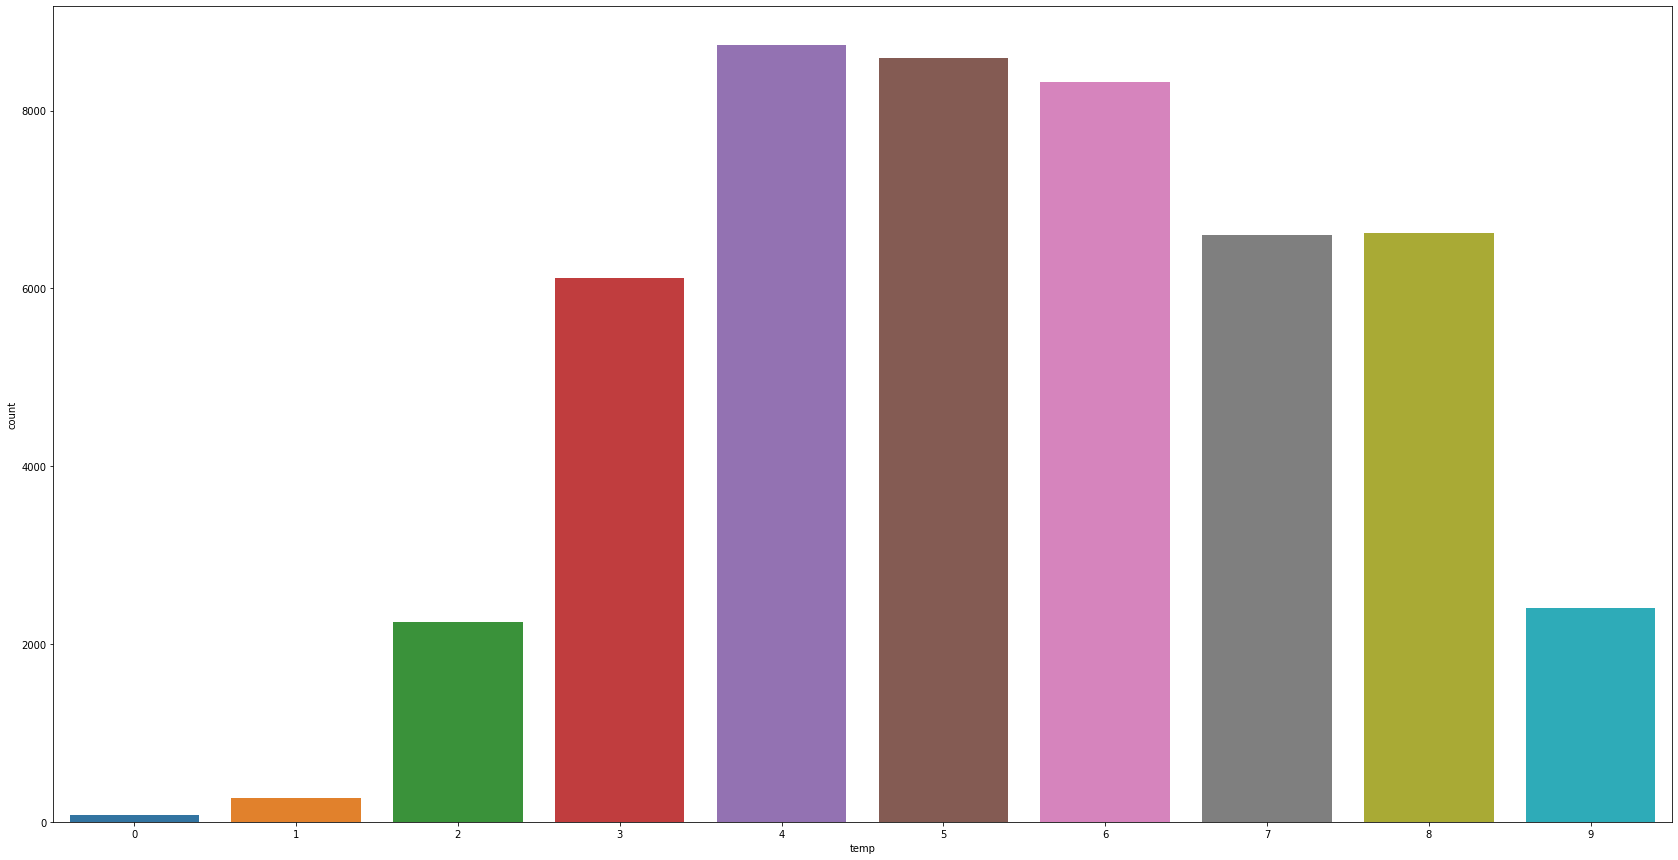

In [83]:
plt.figure(figsize=(29,15))
group_humidity = train.groupby(['humidity'])['count'].sum().reset_index()
ax = sns.barplot(x = group_humidity['humidity'], y = group_humidity['count'])
ax.set(xlabel='temp', ylabel='count')
plt.show()

In [84]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
atemp         17379 non-null float64
holiday       17379 non-null int64
humidity      17379 non-null int64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
date          17379 non-null object
hour          17379 non-null object
weekday       17379 non-null int64
month         17379 non-null int64
dtypes: float64(3), int64(7), object(2)
memory usage: 1.6+ MB


In [85]:
train.head()

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,date,hour,weekday,month,count
0,14.395,0,8,1,1.0,1,0.0,0,2011-01-01,00,5,1,2.833213
1,13.635,0,7,1,1.0,1,0.0,0,2011-01-01,01,5,1,3.713572
2,13.635,0,7,1,1.0,1,0.0,0,2011-01-01,02,5,1,3.496508
3,14.395,0,7,1,1.0,1,0.0,0,2011-01-01,03,5,1,2.639057
4,14.395,0,7,1,1.0,1,0.0,0,2011-01-01,04,5,1,0.693147


In [86]:
test.head()

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,date,hour,weekday,month
10886,11.365,0,5,1,2.0,1,26.0027,1,2011-01-20,00,3,1
10887,13.635,0,5,1,2.0,1,0.0000,1,2011-01-20,01,3,1
10888,13.635,0,5,1,2.0,1,0.0000,1,2011-01-20,02,3,1
10889,12.880,0,5,1,2.0,1,11.0014,1,2011-01-20,03,3,1
10890,12.880,0,5,1,2.0,1,11.0014,1,2011-01-20,04,3,1


In [87]:
train.drop('atemp', axis=1, inplace=True)
train.drop('date', axis=1, inplace=True)
test.drop('atemp', axis=1, inplace=True)
test.drop('date', axis=1, inplace=True)

C:\Kim_Jun_Hyeong\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
train.head()

,holiday,humidity,season,temp,weather,windspeed,workingday,hour,weekday,month,count
0,0,8,1,1.0,1,0.0,0,00,5,1,2.833213
1,0,7,1,1.0,1,0.0,0,01,5,1,3.713572
2,0,7,1,1.0,1,0.0,0,02,5,1,3.496508
3,0,7,1,1.0,1,0.0,0,03,5,1,2.639057
4,0,7,1,1.0,1,0.0,0,04,5,1,0.693147


In [91]:
train.drop('count', axis=1, inplace=True)

In [92]:
all_data = pd.concat((train, test)).reset_index(drop=True)

In [93]:
all_data.head()

,holiday,humidity,season,temp,weather,windspeed,workingday,hour,weekday,month
0,0,8,1,1.0,1,0.0,0,00,5,1
1,0,7,1,1.0,1,0.0,0,01,5,1
2,0,7,1,1.0,1,0.0,0,02,5,1
3,0,7,1,1.0,1,0.0,0,03,5,1
4,0,7,1,1.0,1,0.0,0,04,5,1


In [94]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
holiday       17379 non-null int64
humidity      17379 non-null int64
season        17379 non-null int64
temp          17379 non-null float64
weather       17379 non-null int64
windspeed     17379 non-null float64
workingday    17379 non-null int64
hour          17379 non-null object
weekday       17379 non-null int64
month         17379 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 1.3+ MB


In [95]:
all_data['season'] = all_data['season'].astype(str)
all_data['weather'] = all_data['weather'].astype(str)
all_data['hour'] = all_data['hour'].astype(str)
all_data['weekday'] = all_data['weekday'].astype(str)
all_data['month'] = all_data['month'].astype(str)
all_data['workingday'] = all_data['workingday'].astype(str)
all_data['holiday'] = all_data['holiday'].astype(str)

In [96]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
holiday       17379 non-null object
humidity      17379 non-null int64
season        17379 non-null object
temp          17379 non-null float64
weather       17379 non-null object
windspeed     17379 non-null float64
workingday    17379 non-null object
hour          17379 non-null object
weekday       17379 non-null object
month         17379 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 1.3+ MB


In [97]:
all_data.shape

(17379, 10)

In [98]:
all_data = pd.get_dummies(all_data)
all_data.shape

(17379, 58)

In [100]:
all_data.head()

,humidity,temp,windspeed,holiday_0,holiday_1,season_1,season_2,season_3,season_4,weather_1,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,8,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [101]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [102]:
train.head()

,humidity,temp,windspeed,holiday_0,holiday_1,season_1,season_2,season_3,season_4,weather_1,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,8,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,7,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7,1.0,0.0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [103]:
test.head()

,humidity,temp,windspeed,holiday_0,holiday_1,season_1,season_2,season_3,season_4,weather_1,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
10886,5,2.0,26.0027,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10887,5,2.0,0.0000,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10888,5,2.0,0.0000,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10889,5,2.0,11.0014,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10890,5,2.0,11.0014,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [104]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [105]:
from sklearn.linear_model import LinearRegression

lModel = LinearRegression()
lModel.fit(X=train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
lModel.fit(train,y_train)
lModel_train_pred = lModel.predict(train)
lModel_pred = np.expm1(lModel.predict(test.values))
print("RMSLE value for Linear Regression: ", rmsle(y_train, lModel_train_pred))

RMSLE value for Linear Regression:  0.6028634542141906


C:\Kim_Jun_Hyeong\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
from xgboost import XGBRegressor
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [111]:
model_xgb.fit(train,y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print("RMSLE value for XGBRegressor: ", rmsle(y_train, xgb_train_pred))

RMSLE value for XGBRegressor:  0.31183508326045956


In [112]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [114]:
regr.fit(train, y_train)
regr_train_pred = regr.predict(train)
regr_pred = np.expm1(regr.predict(test.values))
print("RMSLE value for RandomForestRegressor: ", rmsle(y_train, regr_train_pred))

RMSLE value for RandomForestRegressor:  0.1435551421699268


In [117]:
test = pd.read_csv('bike-sharing-demand/test.csv')

timeColumn = test['datetime']

In [118]:
sub = pd.DataFrame()
sub['datetime'] = timeColumn
sub['count'] = regr_pred
sub.to_csv('submission.csv', index=False)

In [119]:
sub.head()

,datetime,count
0,2011-01-20 00:00:00,15.615567
1,2011-01-20 01:00:00,5.008364
2,2011-01-20 02:00:00,4.500737
3,2011-01-20 03:00:00,3.433614
4,2011-01-20 04:00:00,3.042876
